算法思路：找到最近的n个点(欧氏距离)，看哪种标签多，就归类为哪一种

In [23]:
import numpy as np

class KNN:
    def __init__(self, K=3):
        self.k = K
        self.X = None
        self.y = None
    
    def fit(self,X,y):
        self.X = X
        self.y = y

    def euclidean_distence(self,x1,x2):
        dis = x1-x2
        dis = dis*dis
        dis = np.sum(dis)
        return np.sqrt(dis)

    def predict(self, x):
        y_pred = np.zeros(x.shape[0])

        for i in range(x.shape[0]):
            distances = np.zeros((self.X.shape[0],2))

            for j in range(self.X.shape[0]):
                dis = self.euclidean_distence(x[i],self.X[j])
                label = self.y[j]
                distances[j] = [dis, label]
            
            k_nearest_neighbors = distances[distances[:, 0].argsort()][:self.k]
            counts = np.bincount(k_nearest_neighbors[:,1].astype('int'))
            testlabel = counts.argmax()
            y_pred[i] = testlabel
        
        return y_pred



Accuracy: 1.0


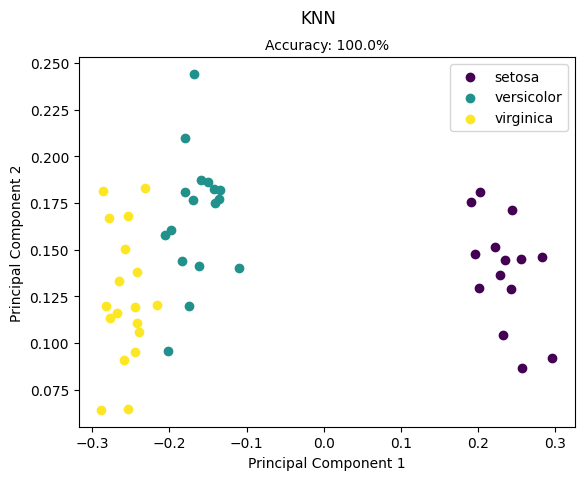

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from utils import train_test_split, normalize, accuracy_score
from utils import Plot
import matplotlib.pyplot as plt


def run():
    data = datasets.load_iris()
    X = normalize(data.data)
    y = data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

    #初始化knn
    model = KNN(K=5)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print("Accuracy:", accuracy)

    # 用图画出测试集的分类情况
    Plot().plot_in_2d(X_test, y_pred, title="KNN", accuracy=accuracy, legend_labels=data.target_names)


if __name__ == "__main__":
    run()

In [18]:
def euclidean_distence(x1,x2):
    dis = x1-x2
    dis = dis*dis
    dis = np.sum(dis)
    return np.sqrt(dis)

In [17]:
x1 = np.array([1,0,0])
x2 = np.array([0,1,1])
print(euclidean_distence(x1,x2))

[1 0 0]
[0 1 1]
1.7320508075688772
